# PROJECT: Retail

## Project task: Week 1

###  Data Cleaning

1) Performing a preliminary data inspection and data cleaning.

In [1]:
# Importing Relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#importing dataset
retail=pd.read_excel('Online Retail.xlsx')

In [3]:
#Checking first five rows of the dataframe
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Checking shape
retail.shape

(541909, 8)

In [5]:
#Printing info about the dataframe
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


**-There seems to be null values in the 'Description' and 'CustomerID' columns**

In [6]:
#Cleaning text in the description column
for text in retail['Description'].unique(): 
    try:
        if (('.'in text) or ('+'in text) or ('?'in text) or ('/'in text) or ('&'in text) or ('*' in text)): #checking for uneccessary symbols in description
            print(text) 
    except:
        continue

RED WOOLLY HOTTIE WHITE HEART.
SET/2 RED RETROSPOT TEA TOWELS 
VINTAGE BILLBOARD LOVE/HATE MUG
WOOD S/3 CABINET ANT WHITE FINISH
SET/6 RED SPOTTY PAPER PLATES
TOMATO CHARLIE+LOLA COASTER SET
CHARLIE & LOLA WASTEPAPER BIN FLORA
RED CHARLIE+LOLA PERSONAL DOORSIGN
GIN + TONIC DIET METAL SIGN
VINTAGE SNAKES & LADDERS
BLACK/BLUE POLKADOT UMBRELLA
SET/20 RED RETROSPOT PAPER NAPKINS 
SET/6 RED SPOTTY PAPER CUPS
S/6 SEW ON CROCHET FLOWERS
LADIES & GENTLEMEN METAL SIGN
SET/10 PINK POLKADOT PARTY CANDLES
LUNCH BAG  BLACK SKULL.
SET/5 RED RETROSPOT LID GLASS BOWLS
PINK B'FLY C/COVER W BOBBLES
REX CASH+CARRY JUMBO SHOPPER
FOLDING UMBRELLA WHITE/RED POLKADOT
FOLDING UMBRELLA RED/WHITE POLKADOT
S/4 VALENTINE DECOUPAGE HEART BOX
CHARLIE + LOLA RED HOT WATER BOTTLE
S/6 WOODEN SKITTLES IN COTTON BAG
S/15 SILVER GLASS BAUBLES IN BAG
SET/10 RED POLKADOT PARTY CANDLES
DIAMANTE HAIR GRIP PACK/2 BLACK DIA
DIAMANTE HAIR GRIP PACK/2 RUBY
DIAMANTE HAIR GRIP PACK/2 MONTANA
SET/10 BLUE POLKADOT PARTY CANDLES
SET

**- Dirty text found in the Description column** 

In [7]:
#Cleaning text
retail['Description']=retail['Description'].str.replace('  ',' ')
retail['Description']=retail['Description'].str.replace('.','')
retail['Description']=retail['Description'].str.replace('+'," and ")
retail['Description']=retail['Description'].str.replace('*','')
retail['Description']=retail['Description'].str.replace('&',' and ')
retail['Description']=retail['Description'].str.replace('SET/','SET OF ')
retail['Description']=retail['Description'].str.replace('S/','SET OF ')
retail['Description']=retail['Description'].str.replace('pack/','pack of ')
retail['Description']=retail['Description'].str.replace('PACK/','pack of ')
retail['Description']=retail['Description'].str.replace('/',' ')
retail['Description']=retail['Description'].str.replace('?','')


C:\Users\ashut\AppData\Local\Temp/ipykernel_9972/631542287.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail['Description']=retail['Description'].str.replace('.','')
C:\Users\ashut\AppData\Local\Temp/ipykernel_9972/631542287.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail['Description']=retail['Description'].str.replace('+'," and ")
C:\Users\ashut\AppData\Local\Temp/ipykernel_9972/631542287.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail['Description']=retail['Description'].str.replace('*',

In [8]:
# Checking for dirty text in the decription column again
for text in retail['Description'].unique(): 
    try:
        if (('.'in text) or ('+'in text) or ('?'in text) or ('/'in text) or ('&'in text) or ('*' in text)): #checking for uneccessary symbols in description
            print(text) 
    except:
        continue

**-No output. Hence, the text in the Description column is clean now for the most part.**

In [9]:
#Checking for bad text in the country column
retail.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

**- Country column is clean.**

--------------

- Checking for missing data and formulating an apt strategy to treat them.

In [10]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Removing negative Quantity and UnitPrice column values
retail=retail[(retail['Quantity']>0) & (retail['UnitPrice']>0)]
print(retail.isna().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64


**- Removing the negative values in quantity and unit price column because those do not contribute anything to the RFM analysis.Also, this approach takes care of the null values in the Description column**

In [12]:
# Finding the top 10 most frequent customers
print(retail['CustomerID'].value_counts().to_frame().reset_index().iloc[:10,0].to_list())
top_10_cust=retail['CustomerID'].value_counts().to_frame().reset_index().iloc[:10,0].to_list()

[17841.0, 14911.0, 14096.0, 12748.0, 14606.0, 15311.0, 14646.0, 13089.0, 13263.0, 14298.0]


In [13]:
#Filling null values in the CustomerID column with the top most frequent customers
for cust in top_10_cust:
    retail['CustomerID'].fillna(cust,inplace=True,limit=13222,axis=0)

**-Implemented Strategy: Instead of dropping 132220 null records, filling the null values with the top 10 frequent values of Customer IDs should fairly take care of the missing values issue.Here, the top 10 CustomerID values are evenly distributed(132220/10) among the CustomerID column**

In [14]:
#Checking for null values again
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

---------

- Removing duplicate data records

In [15]:
#Checking for duplicate records
retail.duplicated().to_frame().value_counts()

False    524878
True       5226
dtype: int64

 **-More than 5000 duplicated data records found.**

In [16]:
#Removing duplicate records
retail=retail[~(retail.duplicated())]

In [17]:
#Checking for duplicate records again
retail.duplicated().to_frame().value_counts()

False    524878
dtype: int64

**-Duplicate data records are no more**

In [18]:
# CustomerID cannot be float.Therefore, converting it into integer
retail['CustomerID']=retail['CustomerID'].astype('int')

---------

- Performing descriptive analytics on the given data.

In [19]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,15084.647114
std,156.280031,36.093028,1671.293640
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13798.000000
50%,4.000000,2.080000,14825.000000
75%,11.000000,4.130000,16485.000000
max,80995.000000,13541.330000,18287.000000


---------------

### Data Transformation

2) Performing cohort analysis. Observing how a cohort behaves across time and compare it to other cohorts.

   - Creating month cohorts and analyzing active customers for each cohort

In [20]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [21]:
#creating a function to get month

def acquire_month(x):
    return dt.datetime(x.year,x.month,1)
    

In [22]:
#Applying the function to get month
retail['invoice month']=retail['InvoiceDate'].apply(acquire_month)
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01


In [23]:
#Finding active customers in each cohort
month_cohort=retail.groupby('invoice month')['CustomerID'].count().to_frame().reset_index()
month_cohort['month']=month_cohort['invoice month'].dt.strftime('%B %Y')
month_cohort.rename(columns={'CustomerID':'total active customers'},inplace=True)
month_cohort

,invoice month,total active customers,month
0,2010-12-01,40991,December 2010
1,2011-01-01,34060,January 2011
2,2011-02-01,26882,February 2011
3,2011-03-01,35497,March 2011
4,2011-04-01,28882,April 2011
5,2011-05-01,35917,May 2011
6,2011-06-01,35716,June 2011
7,2011-07-01,38395,July 2011
8,2011-08-01,34264,August 2011
9,2011-09-01,48900,September 2011


In [24]:
#Finding highest customer activity
highest_customer_activity=month_cohort.sort_values(by='total active customers',ascending=False)['total active customers'].head(1).values
#Finding it's month
highest_customer_activity_month=month_cohort.sort_values(by='total active customers',ascending=False)['month'].head(1).values
#Finding lowest customer activity
lowest_customer_activity=month_cohort.sort_values(by='total active customers',ascending=True)['total active customers'].head(1).values
#Finding it's month
lowest_customer_activity_month=month_cohort.sort_values(by='total active customers',ascending=True)['month'].head(1).values

In [25]:
#cohort mini analysis
print('highest active customers: {} for month: {}\n\nlowest active customers: {} for month: {}\n\naverage customers in the year: {}'.\
      format(highest_customer_activity,highest_customer_activity_month,lowest_customer_activity,lowest_customer_activity_month,\
             int(month_cohort['total active customers'].mean())))

highest active customers: [82004] for month: ['November 2011']

lowest active customers: [24833] for month: ['December 2011']

average customers in the year: 40375


-------------------------

- Analyzing the retention rate of customers

In [26]:
#Finding the month when the customer was acquired
retail['customer acquisition month']=retail.groupby('CustomerID')['invoice month'].transform('min')
retail.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,customer acquisition month
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01,2011-08-01


In [27]:
# Creating a function to calculate day, month, and year
def get_month_year(df,column):
    month=pd.DatetimeIndex(df[column]).month
    year=pd.DatetimeIndex(df[column]).year
    return (month,year)

In [28]:
#calculating month offset
invoice_month,invoice_year=get_month_year(retail,'invoice month')
customer_acquisiton_month,customer_acquisiton_year=get_month_year(retail,'customer acquisition month')

year_diff=invoice_year-customer_acquisiton_year
month_diff=invoice_month-customer_acquisiton_month

retail['customer active months']=year_diff*12+month_diff+1 #Adding 1 because considering the acquisition month itself

In [29]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,customer acquisition month,customer active months
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


**-If 1 wasn't added to the customer active months during month offset calculation, then the active months would be 0 instead of 1 for those customers who only remained active during their entire customer acquistion month itself.**

In [30]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice month,customer acquisition month,customer active months
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01,2011-08-01,5


In [31]:
#Grouping table by acquisition month and customer active months
customer_retention=retail.groupby(['customer acquisition month','customer active months'])['CustomerID'].apply(pd.Series.nunique).to_frame().reset_index()
customer_retention

,customer acquisition month,customer active months,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,323
89,2011-11-01,2,36


In [32]:
#creating a pivot table for customer retention
retention_pivot_table=pd.pivot_table(data=customer_retention,columns='customer active months',index='customer acquisition month',values='CustomerID').reset_index()
retention_pivot_table.rename(columns={'customer acquisition month':'cohort month'},inplace=True)
#formatting date
retention_pivot_table['cohort month']=retention_pivot_table['cohort month'].dt.strftime('%B %Y')
retention_pivot_table.set_index('cohort month',inplace=True)
retention_pivot_table

customer active months,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2010,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
January 2011,418.0,93.0,112.0,96.0,134.0,120.0,103.0,102.0,126.0,137.0,153.0,50.0,NaN
February 2011,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
March 2011,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
April 2011,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
May 2011,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
June 2011,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,168.0,34.0,41.0,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
customer_retention_rate=retention_pivot_table.divide(retention_pivot_table.iloc[:,0],axis=0)
#Presenting customer retention rate
customer_retention_rate

customer active months,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort month,,,,,,,,,,,,,
December 2010,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
January 2011,1.0,0.222488,0.267943,0.229665,0.320574,0.287081,0.246411,0.244019,0.301435,0.327751,0.366029,0.119617,NaN
February 2011,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
March 2011,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
April 2011,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
May 2011,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.202381,0.244048,0.238095,0.119048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='customer active months', ylabel='cohort month'>

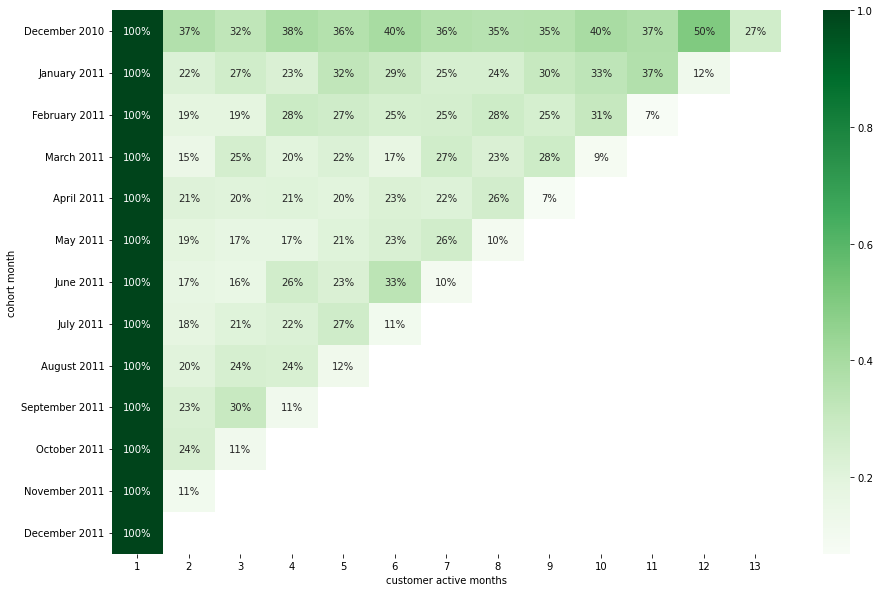

In [34]:
#visualizing customer retention rate
plt.figure(figsize=(15,10))
sns.heatmap(data=customer_retention_rate,annot=True,cmap='Greens',fmt='.0%')

**-INFERENCE1: Highest customer retention is for December 2010 cohort which is 50%(12 months since the customer acquisition)**


**-INFERENCE2: Lowest customer retention is for April 2011 cohort which is 8%(9 months since the custommer acquisition)**

---------------

## Project Task: Week 2

### RFM Data Modeling

- Calculating RFM metrics

In [35]:
#Calculating amount spent by each customer on each order
retail['amount_spent']=retail['Quantity']*retail['UnitPrice']


In [36]:
#Getting the latest date
latest_date=retail['InvoiceDate'].max()

In [37]:
#calculating rfm metrics
rfm_metrics=retail.groupby('CustomerID').agg({'InvoiceDate':lambda x: (latest_date-x.max()).days\
                                              ,'InvoiceNo':'count',\
                                              'amount_spent':'sum'}).reset_index()
#renaming columns
rfm_metrics.columns=['CustomerID','recency','frequency','monetary']
rfm_metrics.head()

,CustomerID,recency,frequency,monetary
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40


- RFM metrics
  

-------------------

3) Building RFM Segments. Giving recency, frequency, and monetary scores individually by dividing them into quartiles.

- Combining three ratings to get a RFM segment (as strings).

In [38]:
# Finding quantiles for rfm metrics
quartiles=rfm_metrics[['recency','frequency','monetary']].quantile(q=[0.25,0.50,0.75]) #taking Q1,Q2,Q3 quartiles
quartiles

,recency,frequency,monetary
0.25,17.0,17.0,306.4825
0.50,50.0,41.0,668.5700
0.75,141.0,98.0,1660.5975


In [39]:
# creating rating functions for the metrics
def r_score(x): # Rating most recent higher and least recent lower
    if x<=quartiles.loc[0.25,'recency']:
        return 4
    elif x<=quartiles.loc[0.50,'recency']:
        return 3
    elif x<=quartiles.loc[0.75,'recency']:
        return 2
    else:
        return 1

def f_score(x): #Rating most frequent higher and least frequent lower
    if x>= quartiles.loc[0.75,'frequency']:
        return 4
    elif x>= quartiles.loc[0.50,'frequency']:
        return 3
    elif x>= quartiles.loc[0.25,'frequency']:
        return 2
    else:
        return 1
    
def m_score(x): #Rating high monetary higher and low monetary lower
    if x>= quartiles.loc[0.75,'monetary']:
        return 4
    elif x>=quartiles.loc[0.50,'monetary']:
        return 3
    elif x>=quartiles.loc[0.25,'monetary']:
        return 2
    else:
        return 1

In [40]:
# Caclculating ratings
rfm_metrics['r_score']=rfm_metrics['recency'].apply(r_score)
rfm_metrics['f_score']=rfm_metrics['frequency'].apply(f_score)
rfm_metrics['m_score']=rfm_metrics['monetary'].apply(m_score)
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score
0,12346,325,1,77183.60,1,1,4
1,12347,1,182,4310.00,4,4,4
2,12348,74,31,1797.24,2,2,4
3,12349,18,73,1757.55,3,3,4
4,12350,309,17,334.40,1,2,2
...,...,...,...,...,...,...,...
4333,18280,277,10,180.60,1,1,1
4334,18281,180,7,80.82,1,1,1
4335,18282,7,12,178.05,4,1,1
4336,18283,3,721,2045.53,4,4,4


- **4 = highest rating; 1 = least rating**

In [41]:
# Building RFM segment
rfm_metrics['RFM_segment']=rfm_metrics.r_score.astype(str)+rfm_metrics.f_score.astype(str)+rfm_metrics.m_score.astype(str)
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment
0,12346,325,1,77183.60,1,1,4,114
1,12347,1,182,4310.00,4,4,4,444
2,12348,74,31,1797.24,2,2,4,224
3,12349,18,73,1757.55,3,3,4,334
4,12350,309,17,334.40,1,2,2,122
...,...,...,...,...,...,...,...,...
4333,18280,277,10,180.60,1,1,1,111
4334,18281,180,7,80.82,1,1,1,111
4335,18282,7,12,178.05,4,1,1,411
4336,18283,3,721,2045.53,4,4,4,444


**-RFM Segment 444 = Most valueable customer ; 111 = Churned customers**

-------------------

- Getting the RFM score by adding up the three ratings

In [42]:
#Adding all the scores to get an RFM score for each customer
rfm_metrics['RFM_score']=rfm_metrics.r_score+rfm_metrics.f_score+rfm_metrics.m_score
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score
0,12346,325,1,77183.60,1,1,4,114,6
1,12347,1,182,4310.00,4,4,4,444,12
2,12348,74,31,1797.24,2,2,4,224,8
3,12349,18,73,1757.55,3,3,4,334,10
4,12350,309,17,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
4333,18280,277,10,180.60,1,1,1,111,3
4334,18281,180,7,80.82,1,1,1,111,3
4335,18282,7,12,178.05,4,1,1,411,6
4336,18283,3,721,2045.53,4,4,4,444,12


 - **RFM score 12 = Most valuable customer ;  3 = Churned customers**


In [43]:
#Creating customer segments based on rfm score
rfm_metrics['customer_segment']=0 # creating customer segment column
rfm_metrics.loc[(rfm_metrics.RFM_score>=3) & (rfm_metrics.RFM_score<=5),'customer_segment']='Churned customers'
rfm_metrics.loc[(rfm_metrics.RFM_score>=6) & (rfm_metrics.RFM_score<=8),'customer_segment']='MID level customers'
rfm_metrics.loc[(rfm_metrics.RFM_score>=9) & (rfm_metrics.RFM_score<=12),'customer_segment']='HIGH level customers'



In [44]:
rfm_metrics

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score,customer_segment
0,12346,325,1,77183.60,1,1,4,114,6,MID level customers
1,12347,1,182,4310.00,4,4,4,444,12,HIGH level customers
2,12348,74,31,1797.24,2,2,4,224,8,MID level customers
3,12349,18,73,1757.55,3,3,4,334,10,HIGH level customers
4,12350,309,17,334.40,1,2,2,122,5,Churned customers
...,...,...,...,...,...,...,...,...,...,...
4333,18280,277,10,180.60,1,1,1,111,3,Churned customers
4334,18281,180,7,80.82,1,1,1,111,3,Churned customers
4335,18282,7,12,178.05,4,1,1,411,6,MID level customers
4336,18283,3,721,2045.53,4,4,4,444,12,HIGH level customers


**-RFM_score: 3-5 => Churned customers**

**-RFM_score: 6-8 => MID level customers**

**-RFM_score: 9-12 => HIGH level customers**

---------------

 - Analyzing the RFM segments by summarizing them and comment on the findings.

In [45]:
#calculating average RFM_score
avg_rfm_score=rfm_metrics['RFM_score'].mean()
#calculating median rfm_score
median_rfm_score=rfm_metrics['RFM_score'].median()

In [46]:
# RFM segments summary
print('Average rfm score of all cusotmers is: {}\n\nMedian rfm score of all customers is: {}'\
     .format(round(avg_rfm_score,2),median_rfm_score))

Average rfm score of all cusotmers is: 7.53

Median rfm score of all customers is: 7.0


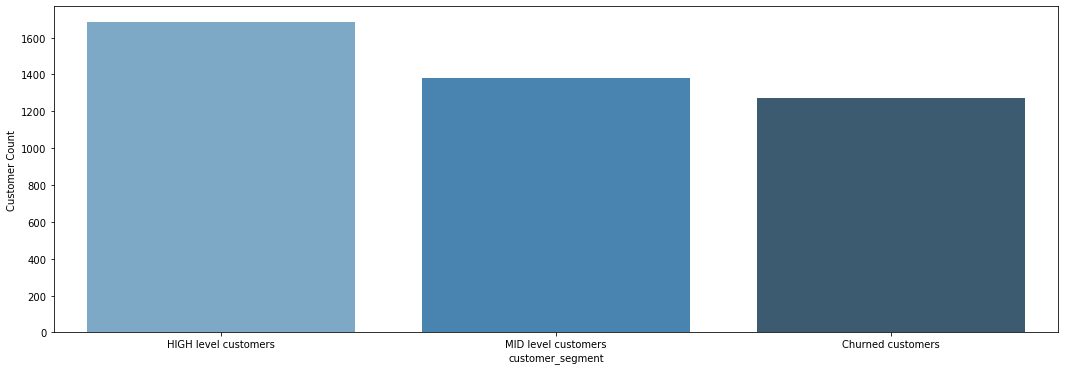

In [47]:
#Visualizing customer segments
plt.figure(figsize=(18,6))
sns.barplot(x='customer_segment',y='CustomerID',data=rfm_metrics,estimator=np.count_nonzero,palette="Blues_d",\
            order=['HIGH level customers','MID level customers','Churned customers'])
plt.ylabel('Customer Count')
plt.show()

**-Total high level customers are:1686**

**-Total mid level customers are:1381**

**-Total churned customers are:1271**

**-There is a possibility of getting the attention of the churned customers back if proper targetted marketing is performed**

-----------

## Project Task: Week 3

### Data Modeling

1) Create clusters using k-means clustering algorithm.

 - Preparing the data for the algorithm. If the data is asymmetrically distributed, managing the skewness with appropriate transformation. Standardizing the data.

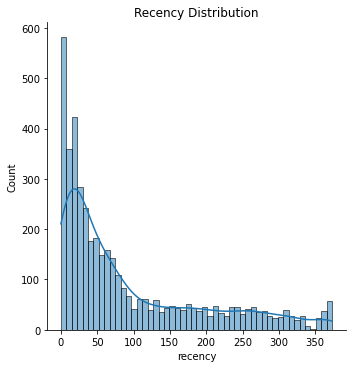

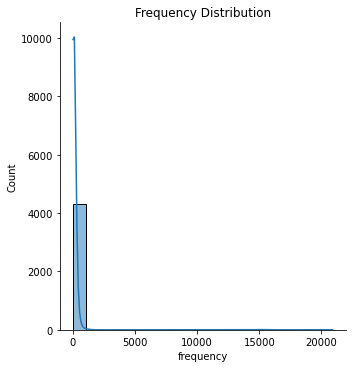

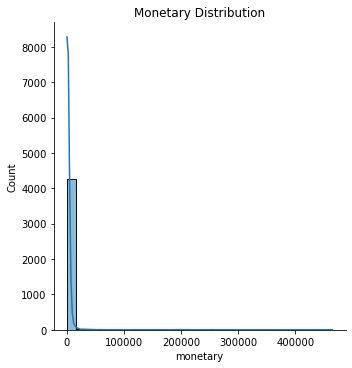

In [48]:
#Checking the distribution of the data

#Recency distribution
sns.displot(data=rfm_metrics,x='recency',kde=True,bins=50)
plt.title('Recency Distribution')
plt.show()
#Frequency distribution
sns.displot(data=rfm_metrics,x='frequency',kde=True,bins=20)
plt.title('Frequency Distribution')
plt.show()
#Monetary distribution
sns.displot(data=rfm_metrics,x='monetary',kde=True,bins=30)
plt.title('Monetary Distribution')
plt.show()

- **Data is right skewed heavily for all RFM values**

----------

In [49]:
# handling Zero values because log transformation of zero value would result in infinte value

#Creating a function to manage zero values
def manage_zero_val(x):
    if x<=0:
        return 1
    else:
        return x
#applying function
rfm_metrics['recency']=rfm_metrics['recency'].apply(manage_zero_val)
rfm_metrics['frequency']=rfm_metrics['frequency'].apply(manage_zero_val)
rfm_metrics['monetary']=rfm_metrics['monetary'].apply(manage_zero_val)

In [50]:
# log transforming data
log_trans_data=rfm_metrics[['recency','frequency','monetary']].apply(np.log,axis=0).round(2)

In [51]:
log_trans_data

,recency,frequency,monetary
0,5.78,0.00,11.25
1,0.00,5.20,8.37
2,4.30,3.43,7.49
3,2.89,4.29,7.47
4,5.73,2.83,5.81
...,...,...,...
4333,5.62,2.30,5.20
4334,5.19,1.95,4.39
4335,1.95,2.48,5.18
4336,1.10,6.58,7.62


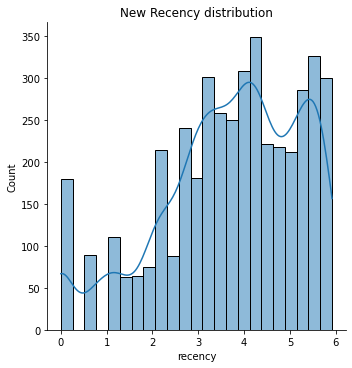

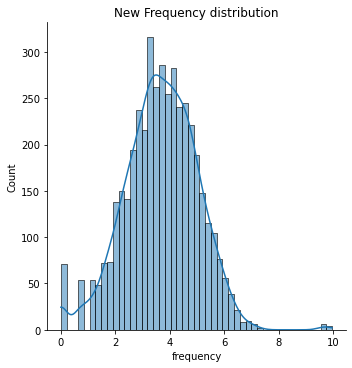

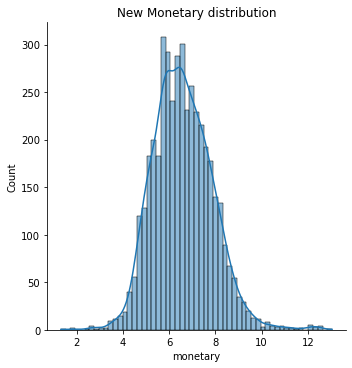

In [52]:
#Checking the distribution of the data again
sns.displot(data=log_trans_data,x='recency',kde=True)
plt.title('New Recency distribution')
plt.show()
sns.displot(data=log_trans_data,x='frequency',kde=True)
plt.title('New Frequency distribution')
plt.show()
sns.displot(data=log_trans_data,x='monetary',kde=True)
plt.title('New Monetary distribution')
plt.show()

**- Better data distribution. Sknewness of the data has been taken care of**

In [54]:
#Standardizing the data
ss=StandardScaler()
rfm_metrics_scaled=ss.fit_transform(log_trans_data)
rfm_metrics_scaled=pd.DataFrame(data=rfm_metrics_scaled,columns=log_trans_data.columns,index=log_trans_data.index)
rfm_metrics_scaled

,recency,frequency,monetary
0,1.370627,-2.751404,3.653820
1,-2.449940,1.141446,1.395897
2,0.392351,-0.183620,0.705977
3,-0.539656,0.460197,0.690297
4,1.337578,-0.632795,-0.611145
...,...,...,...
4333,1.264868,-1.029566,-1.089385
4334,0.980639,-1.291585,-1.724426
4335,-1.160995,-0.894814,-1.105065
4336,-1.722843,2.174548,0.807897


- Scaled Data

-------------

- Finding the optimum number of clusters to be formed

In [56]:
wcss=[] #sum of squares within cluster

for num in range(1,11):
    cluster=KMeans(n_clusters=num,random_state=16)
    cluster.fit(rfm_metrics_scaled)
    wcss.append(cluster.inertia_)

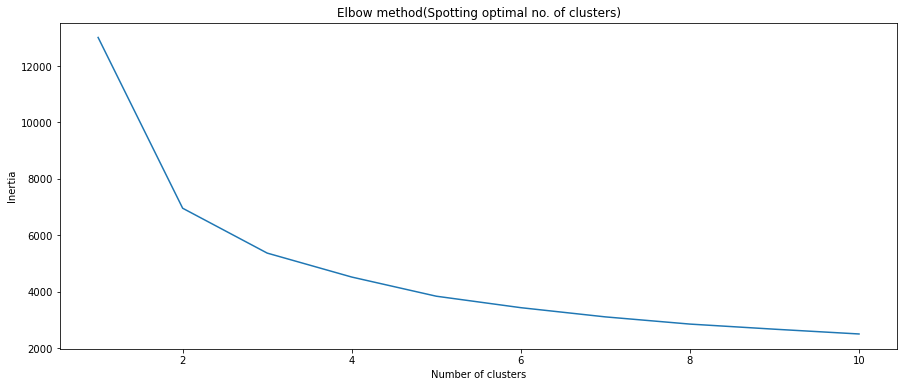

In [57]:
#Finding optimal number of clusters using elbow method
plt.figure(figsize=(15,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow method(Spotting optimal no. of clusters)")
plt.show()

- **Judging by the graph the number optimal custers seem to be 3**

In [58]:
# Perfoming kmeans clustering using optimal number of clusters
kmeans=KMeans(n_clusters=3,random_state=16)
kmeans.fit(rfm_metrics_scaled)

KMeans(n_clusters=3, random_state=16)

In [59]:
#Adding labels
label=kmeans.labels_
rfm_metrics['label']=label
rfm_metrics.head()

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,RFM_segment,RFM_score,customer_segment,label
0,12346,325,1,77183.60,1,1,4,114,6,MID level customers,1
1,12347,1,182,4310.00,4,4,4,444,12,HIGH level customers,2
2,12348,74,31,1797.24,2,2,4,224,8,MID level customers,1
3,12349,18,73,1757.55,3,3,4,334,10,HIGH level customers,1
4,12350,309,17,334.40,1,2,2,122,5,Churned customers,0


In [68]:
#custer centers
centers=kmeans.cluster_centers_
centers

array([[ 0.69684914, -0.9566281 , -0.90719025],
       [ 0.03496254,  0.24677305,  0.16951707],
       [-1.27648292,  1.14358842,  1.21769962]])

<IPython.core.display.Javascript object>


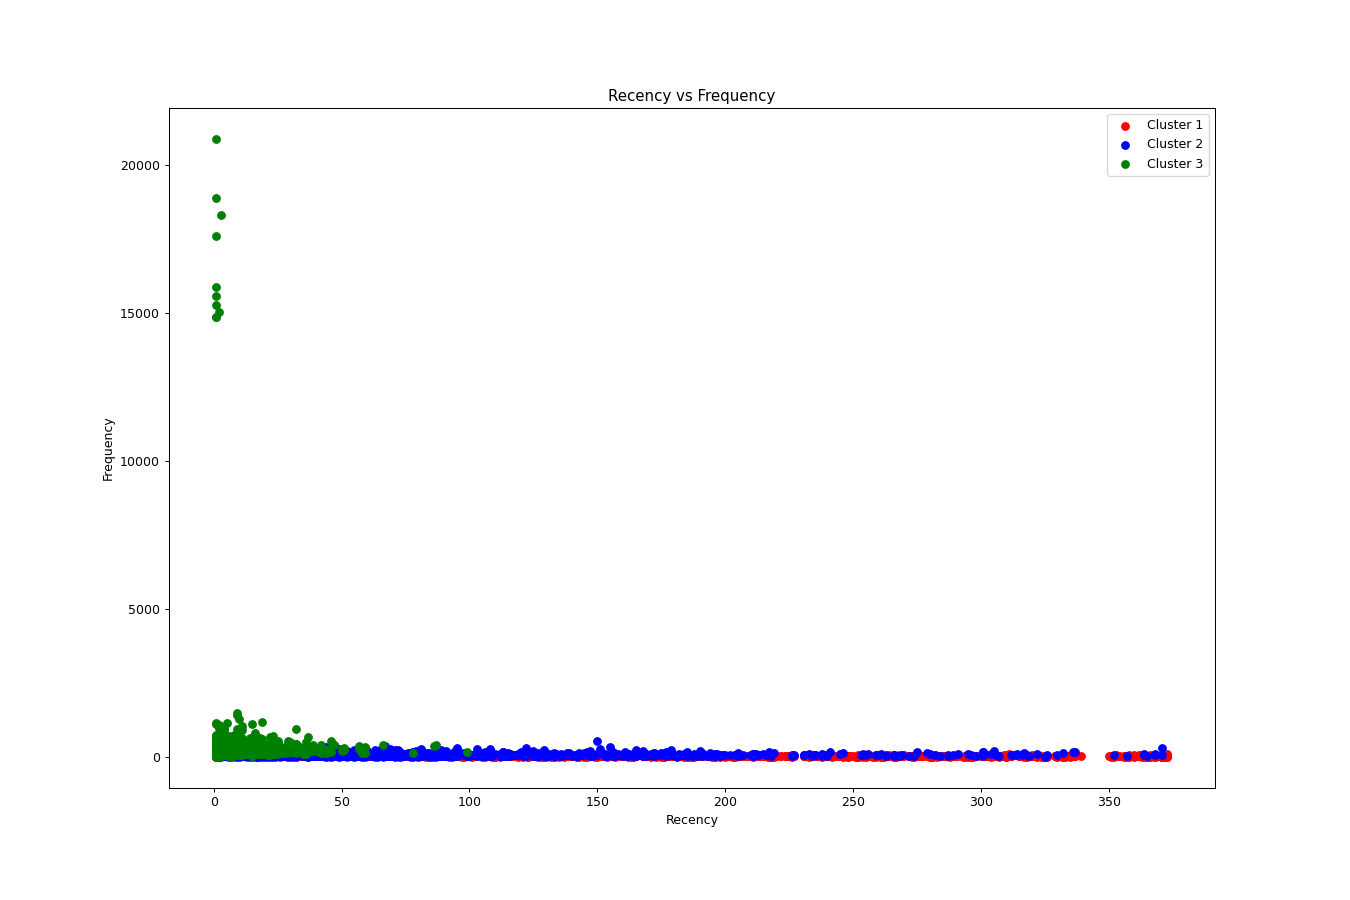

In [70]:
# Visualizing the data (Creating RECENCY VS FREQUENCY) 2D viz
plt.figure(figsize=(15,10))
plt.scatter(rfm_metrics[label==0]['recency'],rfm_metrics[label==0]['frequency'],label='Cluster 1',c='red')
plt.scatter(rfm_metrics[label==1]['recency'],rfm_metrics[label==1]['frequency'],label='Cluster 2',c='blue')
plt.scatter(rfm_metrics[label==2]['recency'],rfm_metrics[label==2]['frequency'],label='Cluster 3',c='green')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.show()

**-Lower the recency higher is the frequency**

<IPython.core.display.Javascript object>


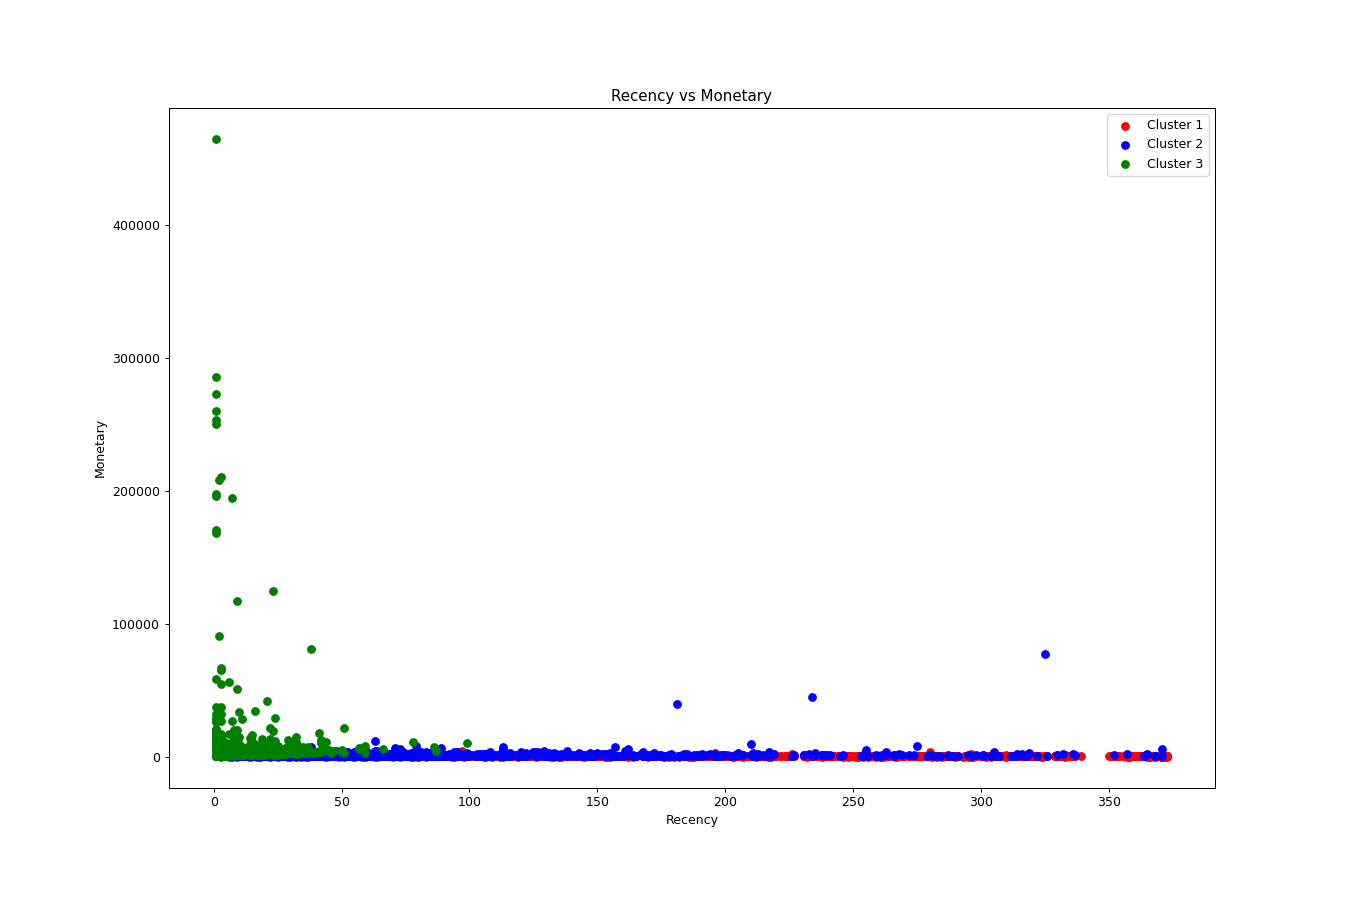

In [71]:
# Visualizing the data (Creating RECENCY VS MONETARY) 2D viz
plt.figure(figsize=(15,10))
plt.scatter(rfm_metrics[label==0]['recency'],rfm_metrics[label==0]['monetary'],label='Cluster 1',c='red')
plt.scatter(rfm_metrics[label==1]['recency'],rfm_metrics[label==1]['monetary'],label='Cluster 2',c='blue')
plt.scatter(rfm_metrics[label==2]['recency'],rfm_metrics[label==2]['monetary'],label='Cluster 3',c='green')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')
plt.show()

**-Lower the recency higher is the monetary**

<IPython.core.display.Javascript object>


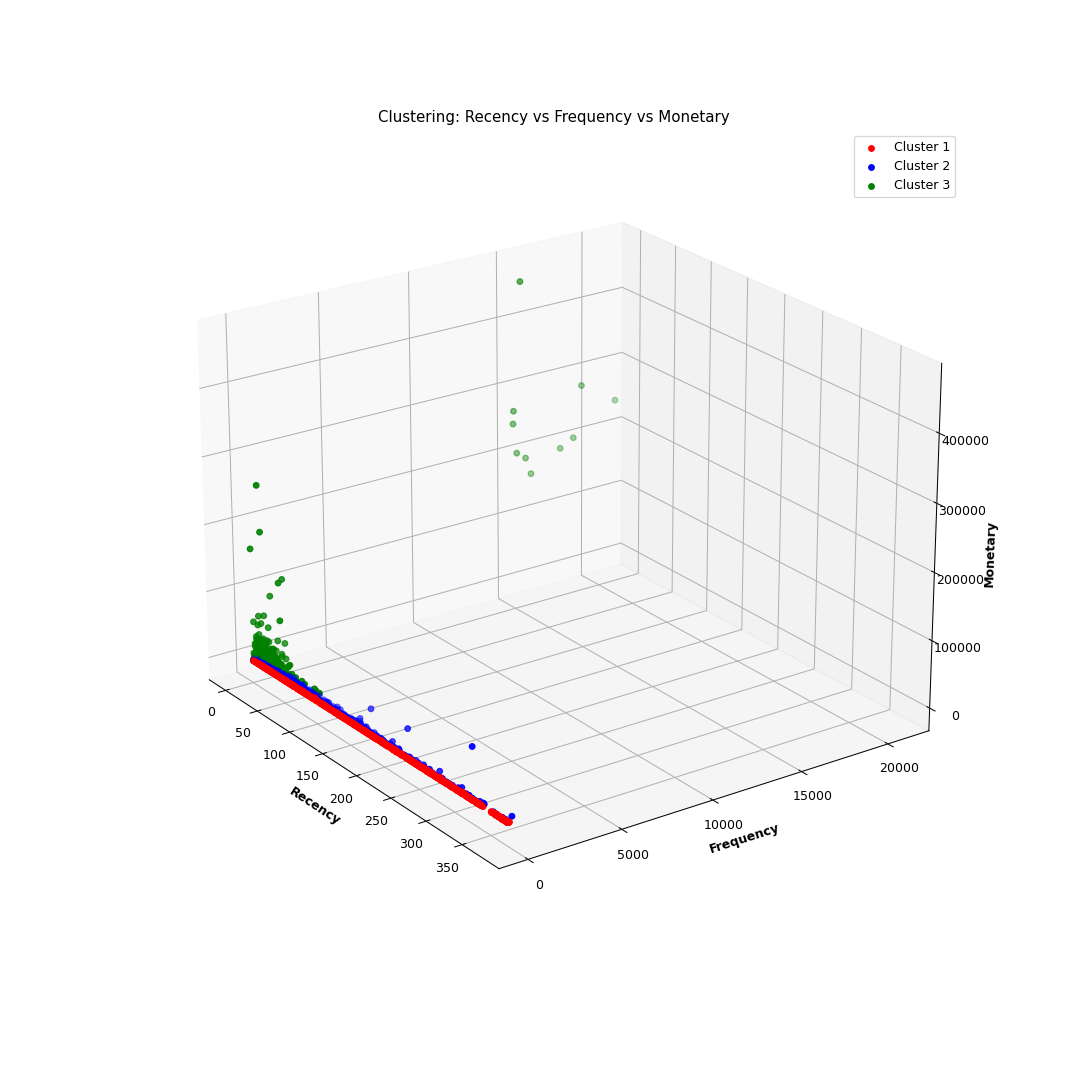

In [76]:
# Visualizing the data in 3D
%matplotlib notebook
plt.figure(figsize=(12,12))
ax=plt.axes(projection='3d')
ax.scatter(rfm_metrics[label==0]['recency'],rfm_metrics[label==0]['frequency'],rfm_metrics[label==0]['monetary'],label='Cluster 1',c='red')
ax.scatter(rfm_metrics[label==1]['recency'],rfm_metrics[label==1]['frequency'],rfm_metrics[label==1]['monetary'],label='Cluster 2',c='blue')
ax.scatter(rfm_metrics[label==2]['recency'],rfm_metrics[label==2]['frequency'],rfm_metrics[label==2]['monetary'],label='Cluster 3',c='green')
plt.xlabel('recency')
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
plt.title('Clustering: Recency vs Frequency vs Monetary')
plt.legend()
plt.show()

-----------

- Analyzing these clusters and commenting on the results.

### INSIGHTS

#### Insight 1: Recency and Frequency are inversely proportional(for cluster 3[Green])


- Customers belonging to cluster 3 (green) who made purchases recently had the highest visits to the website among all customers belonging to other clusters.

#### Insight 2: The BIG spender cluster 3

- Customers in the cluster 3[green] are the most valuable of all.Majority of the revenue generated comes from these customers

#### Insight 3: The LEAST spender cluster 1

- Customers belonging to RED cluster are churned customers. Recency has little to no effect on both frequency and monetary.

#### Insight 3: The OCASSIONAL spender cluster 2

- Customers in this cluster occasionaly visit the wesite and spend money.Targetting these customers frequently with great offers such as discounts could help improve in keeping these customers more active.

# Dashboard link

https://public.tableau.com/app/profile/ashutoshsinghwastaken/viz/Project3RetailDashboard/Dashboard1

# END